In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\homicide_by_countries.csv")


In [3]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [4]:
df.shape

(195, 6)

In [5]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [8]:
df['Rate'] = df['Rate'].astype(int)

In [9]:
my_list = ['Rate', 'Count', 'Year']
for i in my_list:
    print(i)
    df[i] = df[i].astype(int)

Rate
Count
Year


In [10]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [11]:
df.replace({'Region': {'Americas': 'N/S America'}}, inplace=True)


In [13]:
df1 = df.sort_values('Count', ascending = False).reset_index(drop = True)
df1

,Location,Region,Subregion,Rate,Count,Year
0,Brazil,N/S America,South America,22,47722,2020
1,Nigeria,Africa,Western Africa,22,44200,2019
2,India,Asia,Southern Asia,3,40651,2020
3,Mexico,N/S America,Central America,28,36579,2020
4,United States,N/S America,Northern America,6,21570,2020
...,...,...,...,...,...,...
190,Holy See,Europe,Southern Europe,0,0,2015
191,Channel Islands,Europe,Northern Europe,0,0,2010
192,Saint Helena,Africa,Western Africa,0,0,2009
193,San Marino,Europe,Southern Europe,0,0,2011


In [14]:
df1 = df[['Location', 'Count']].sort_values(by = 'Count', ascending = False).head(5)
df1['Perc'] = (df1['Count']*100 /df1['Count'].sum()).round(2)
df1

,Location,Count,Perc
26,Brazil,47722,25.02
125,Nigeria,44200,23.18
78,India,40651,21.31
111,Mexico,36579,19.18
186,United States,21570,11.31


<Axes: xlabel='Location'>

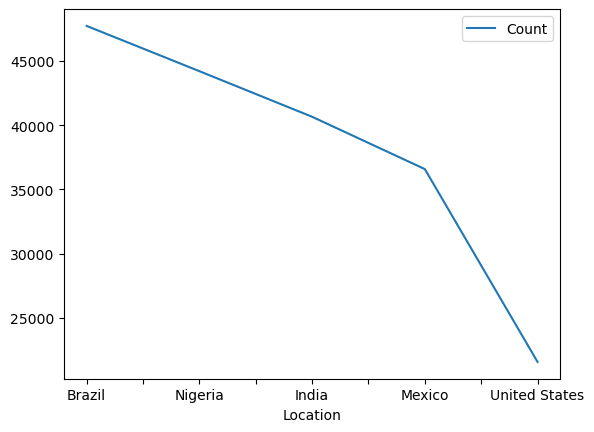

In [15]:
df1.plot(x = 'Location', y = 'Count')


In [16]:
df1.Location

26            Brazil
125          Nigeria
78             India
111           Mexico
186    United States
Name: Location, dtype: object

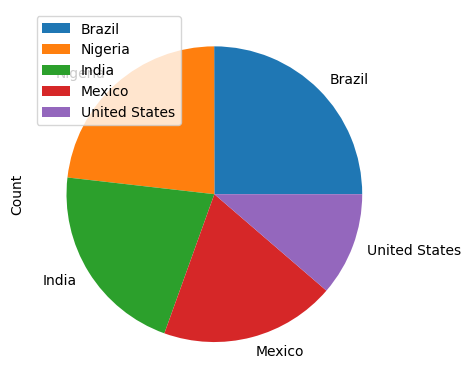

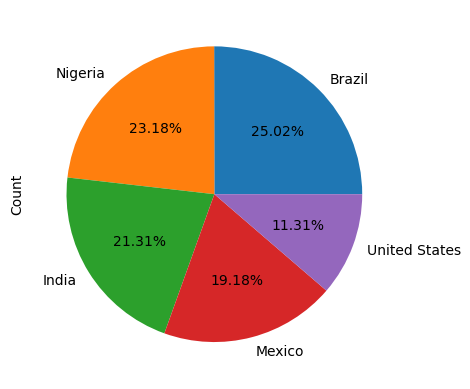

In [17]:
df1.plot(x = 'Location', y = 'Count', kind = 'pie', labels = df1.Location,)
df1.plot(x = 'Location', y = 'Count', kind = 'pie', labels = df1.Location, autopct = '%1.2f%%')
plt.legend().set_visible(False)

In [18]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [19]:
df2 = df.groupby('Region')['Count'].sum().sort_values(ascending = False)
df2

Region
N/S America    153597
Asia           105552
Africa          99481
Europe          19869
Oceania           347
Name: Count, dtype: int32

<Axes: xlabel='Region'>

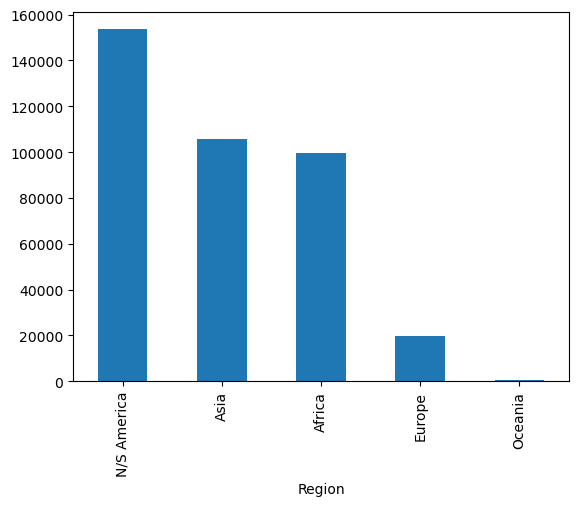

In [20]:
df2.plot(kind = 'bar')

<Axes: xlabel='Region'>

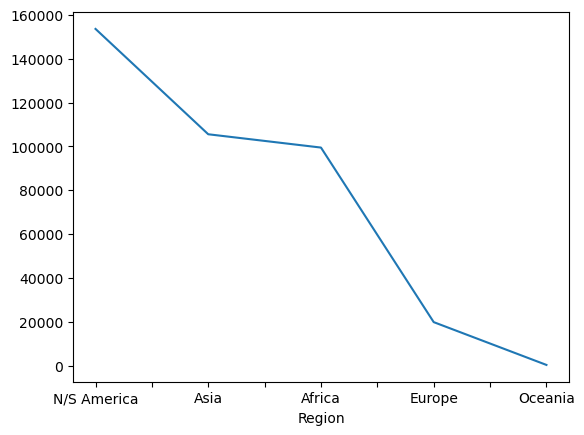

In [21]:
df2.plot(kind = 'line')

In [22]:
df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending = False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int32

In [23]:
df3.index

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')

In [24]:
df3.values

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347])

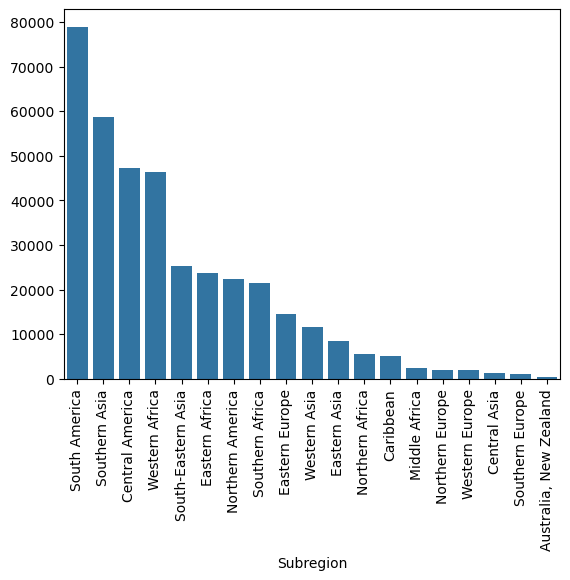

In [25]:
sns.barplot(x=df3.index, y = df3.values)
plt.xticks(rotation = 'vertical')
xlabel = None

In [26]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [27]:
df.Year.value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [28]:
df[df['Region'].isin(['Asia', 'Europe'])]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [29]:
df4 = df[(df['Region'] == 'Asia') | (df['Region'] == 'Europe')]


In [30]:
df4 = df4[df4['Year']>2016][['Region', 'Year', 'Count']]

In [31]:
df4

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [32]:

df4 = df4.groupby(['Region', 'Year']).sum()


In [33]:
df4

Count
Region Year       
Asia   2017   1787
       2018  16923
       2019   6458
       2020  53516
       2021  15299
Europe 2017   3670
       2018    883
       2019    249
       2020  15066

<Axes: xlabel='Region,Year'>

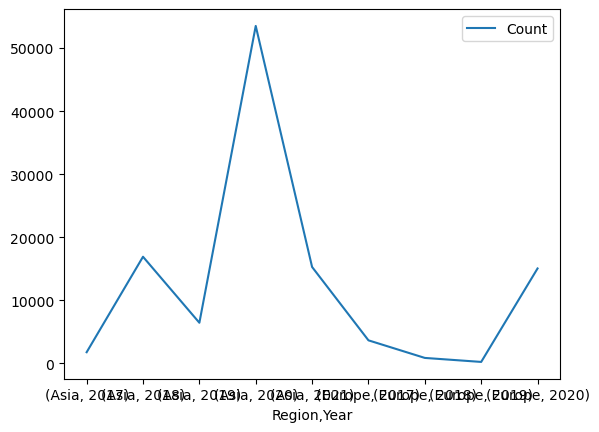

In [34]:
df4.plot(kind = 'line')

In [35]:
df_unstacked = df4.unstack(level = 0)
df_unstacked

Count         
Region     Asia   Europe
Year                    
2017     1787.0   3670.0
2018    16923.0    883.0
2019     6458.0    249.0
2020    53516.0  15066.0
2021    15299.0      NaN

In [38]:
df_unstacked.index = df_unstacked.index.astype(int).astype(str)


Text(0.5, 1.0, 'Count of Asia and Europe over years')

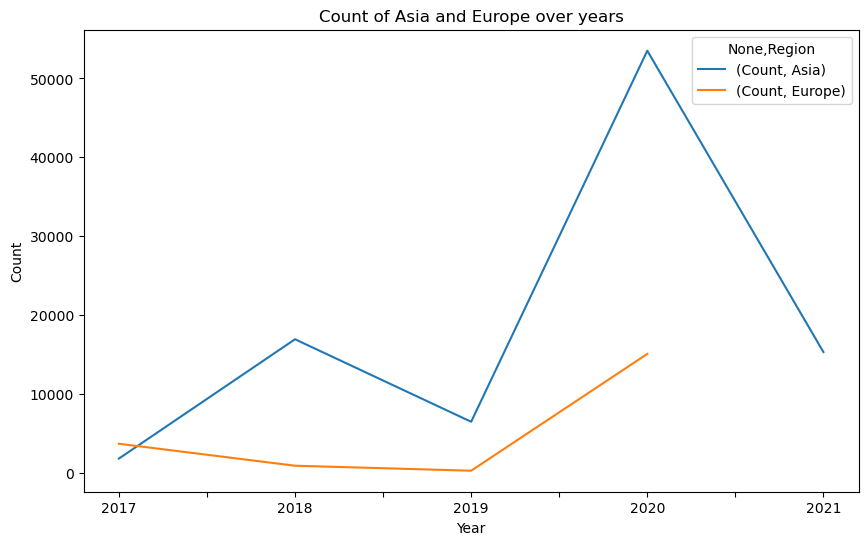

In [48]:

df_unstacked.plot(kind = 'line', figsize = (10,6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Asia and Europe over years')

In [51]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [52]:
df5 = df.groupby(['Year'])['Rate'].sum().sort_values(ascending = False)

In [53]:
df5

Year
2020    564
2019    153
2012    113
2016     76
2018     64
2015     55
2014     52
2009     36
2021     28
2017     27
2013     20
2007     19
2010     18
2006     12
2011      8
2008      5
Name: Rate, dtype: int32

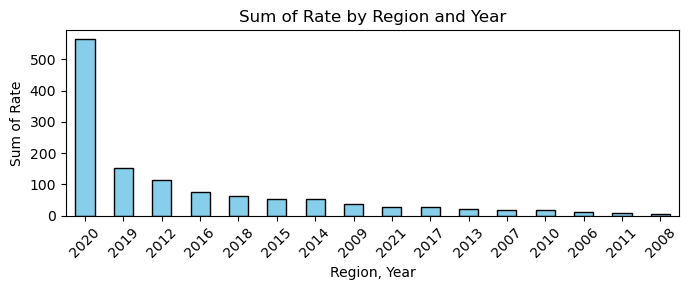

In [56]:
import matplotlib.pyplot as plt

df5.plot(kind='bar', figsize=(7, 3), color='skyblue', edgecolor='black')
plt.xlabel('Region, Year')  # Proper label for combined axis
plt.ylabel('Sum of Rate')         # Label for y-axis
plt.title('Sum of Count by Region and Year')  # Add title
plt.xticks(rotation=45)     # Rotate x-axis labels for better readability
plt.tight_layout()          # Adjust layout to fit labels
plt.show()


In [59]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [66]:
df6 = df[['Year', 'Region', 'Count']]
df6 = df.groupby(['Year', 'Region']).sum().sort_values(by=['Year', 'Region'], ascending=[False, True])


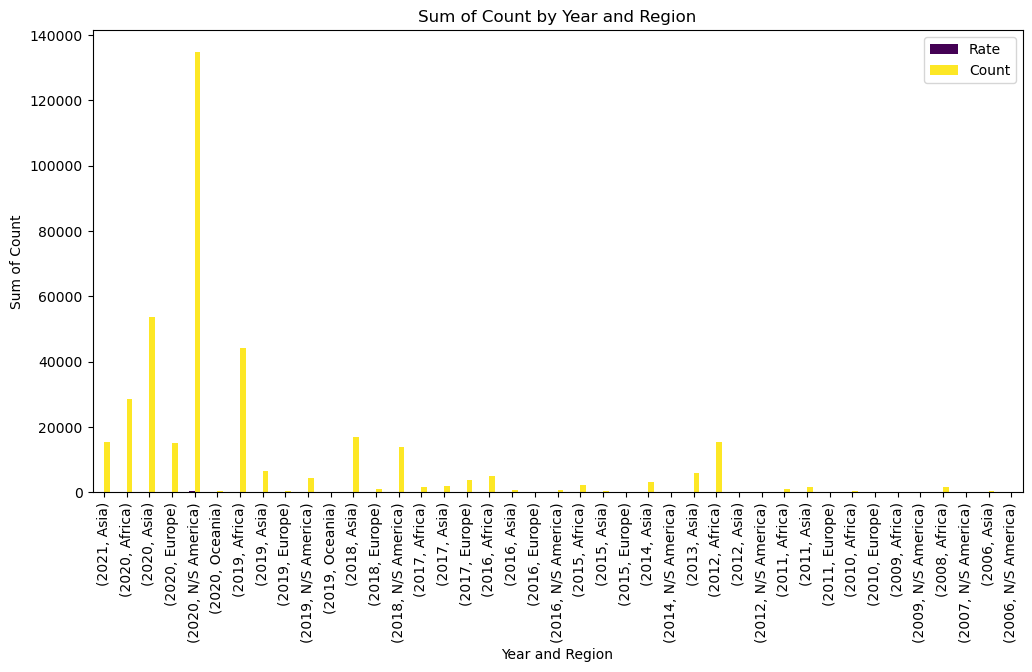

In [94]:
import matplotlib.pyplot as plt

# Example DataFrame plotting (assuming df6 is defined)
df6.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.xlabel('Year and Region')  # Correctly set x-axis label
plt.ylabel('Sum of Count')     # Correctly set y-axis label
plt.title('Sum of Count by Year and Region')  # Correctly set title
plt.show()






In [100]:
df7 = df.groupby('Subregion')['Count'].sum().sort_values(ascending=False)
df7


Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int32

In [102]:
df7.index

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')

In [104]:
df7.values

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347])

In [108]:
import pandas as pd

# Assuming df7 is already created
data = {
    'Category': df7.index,
    'Values': df7.values,
    'Info': df7.values
}

df_new = pd.DataFrame(data)
df_new


,Category,Values,Info
0,South America,78872,78872
1,Southern Asia,58631,58631
2,Central America,47371,47371
3,Western Africa,46318,46318
4,South-Eastern Asia,25314,25314
5,Eastern Africa,23669,23669
6,Northern America,22317,22317
7,Southern Africa,21479,21479
8,Eastern Europe,14604,14604
9,Western Asia,11638,11638


In [132]:
pip install plotly notebook ipywidgets


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [145]:
%matplotlib inline

import plotly.io as pio
pio.renderers.default = 'notebook'